In [143]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime

# 우리나라기후데이터

In [144]:
# 파일 불러오기
df = pd.read_csv('./국내기후(백령도제외).csv', index_col=0)

# 시간 datetim형식으로 바꾸기
df['시간'] = pd.to_datetime(df['시간'], format='%Y-%m-%d')

# 2006 - 2021-08-31의 기후 데이터만 가져오기
df_k = df[df['시간'] > '2001-05-10']
df_k = df_k[df_k['시간'] < '2021-09-01']
df_k = df_k.reset_index()
df_k.drop('index', axis=1, inplace=True)

# 태풍예측에 필요없는 기후데이터 drop
df_seoul = df_k[df_k.columns]
df_seoul.columns
df_seoul.drop(['1시간 최다강수량','1시간 최다 일사량', '합계 일조 시간','합계 일사','일 최심신적설','일 최심적설',
               '합계 3시간 신적설',
             '합계 대형증발량','합계 소형증발량'], axis=1, inplace=True)

# column 이름 바꾸기
df_seoul.rename(columns={'시간':'일시', '관측지점':'도시명'}, inplace=True)

# 우리나라를 동부, 서부, 남부지역으로 군집
west_w = ['서울','전주','광주']
east_w = ['강릉','춘천','청주','대구']
south_w = ['제주']

no_li_w=[]
for i in df_seoul['도시명']:
    if i in west_w:
        no_li_w.append('ko_w')
    elif i in east_w:
        no_li_w.append('ko_e')
    else:
        no_li_w.append('ko_s')
        
df_seoul['군집'] = no_li_w

# 군집별로 같은 날짜로 묶어주기
df_seoul_n = df_seoul.groupby(['군집', '일시']).agg({'평균 기온':'mean','최저 기온':'min','최고 기온':'max',
                                                '일강수량':'mean','최대 순간풍속': 'mean','최대 순간 풍속 풍향':'mean',
                                               '최대 풍속':'mean','최대 풍속 풍향':'mean','평균 풍속':'mean','풍정합':'mean',
                                                '최대 풍향':'mean',
                                               '평균 이슬점온도':'mean','평균 상대습도':'mean','평균 증기압':'mean',
                                               '평균 현지기압':'mean','최고 해면 기압':'max','최저 해면기압':'min',
                                               '평균 해면기압':'mean',
                                               '평균 전운량':'mean','평균 중하층운량':'mean','평균 지면온도':'mean',
                                               '안개 계속 시간':'mean'})
df_seoul_n = df_seoul_n.reset_index()

# 각 column마다 군집별 이름 넣어주기
tdf_k = pd.DataFrame()

gun_k_li = list(df_seoul_n['군집'].unique())

for gun in gun_k_li:
    tmp_k = df_seoul_n[df_seoul_n['군집']==gun].drop(['군집','일시'],axis=1).reset_index(drop=True)
    tmp_k.columns = gun+tmp_k.columns
    tdf_k = pd.concat([tdf_k,tmp_k],axis=1)
df_k_g = tdf_k
df_k_g

,ko_e평균 기온,ko_e최저 기온,ko_e최고 기온,ko_e일강수량,ko_e최대 순간풍속,ko_e최대 순간 풍속 풍향,ko_e최대 풍속,ko_e최대 풍속 풍향,ko_e평균 풍속,ko_e풍정합,...,ko_w평균 상대습도,ko_w평균 증기압,ko_w평균 현지기압,ko_w최고 해면 기압,ko_w최저 해면기압,ko_w평균 해면기압,ko_w평균 전운량,ko_w평균 중하층운량,ko_w평균 지면온도,ko_w안개 계속 시간
0,16.775,6.1,23.5,0.000,8.275,272.5,4.425,272.5,1.825,1576.75,...,54.300000,9.633333,1007.766667,1018.4,1013.1,1016.266667,1.500000,1.066667,22.433333,0.000000
1,19.325,7.2,27.7,0.000,8.625,255.0,4.850,265.0,2.050,1777.50,...,51.000000,9.233333,1008.466667,1019.1,1014.1,1016.933333,0.200000,0.000000,23.033333,0.000000
2,21.000,6.8,32.7,0.000,8.925,262.5,4.750,267.5,2.150,1865.25,...,43.700000,8.700000,1008.166667,1018.5,1014.2,1016.566667,1.666667,0.000000,24.100000,0.000000
3,21.175,8.2,30.7,0.000,8.375,270.0,4.625,272.5,1.725,1491.00,...,41.300000,9.400000,1006.400000,1017.0,1012.1,1014.733333,3.933333,1.700000,25.433333,0.000000
4,19.350,7.2,27.6,0.025,10.800,232.5,5.725,242.5,2.525,2174.50,...,72.666667,15.200000,1003.866667,1014.8,1008.9,1012.233333,7.733333,4.700000,20.600000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,23.200,19.8,28.7,8.875,6.350,280.0,3.900,297.5,1.075,945.00,...,92.233333,25.266667,1004.433333,1014.4,1010.3,1012.766667,8.766667,5.566667,24.333333,0.166667
7414,24.575,19.3,31.9,0.075,5.525,192.5,3.350,192.5,1.450,1249.50,...,82.166667,24.300000,1005.633333,1015.5,1012.3,1013.866667,7.200000,4.833333,25.933333,0.000000
7415,23.675,18.6,30.6,6.600,5.725,225.0,3.475,220.0,1.400,1191.00,...,89.300000,26.600000,1005.133333,1015.5,1012.0,1013.366667,8.866667,5.433333,26.066667,0.000000
7416,24.200,19.2,30.6,0.050,4.500,165.0,2.750,217.5,1.250,1054.00,...,83.700000,25.700000,1007.200000,1016.8,1013.7,1015.433333,8.433333,5.000000,26.100000,0.000000


# 고층기후데이터

In [12]:
# 고층 데이터 불러오기
df_k_h = pd.read_csv('./preprocessed_고층기후데이터.csv', index_col=0)
df_k_h = df_k_h.reset_index()

# 1995 - 2021-08-31의 기후 데이터만 가져오기
df_k_h['일시'] = pd.to_datetime(df_k_h['일시'], format='%Y-%m-%d')
df_k_h = df_k_h[df_k_h['일시'] > '2001-05-10']
df_k_h = df_k_h[df_k_h['일시'] < '2021-09-01']
df_k_h = df_k_h.reset_index()
df_k_h.drop('index', axis=1, inplace=True)

df_k_h

,일시,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
0,2001-05-11,20690.000000,-54.800,-69.550000,271.250000,15.500000,18555.000000,-57.000000,-71.000000,276.250000,...,789.75,10.450000,2.350000,301.250000,13.750000,137.750000,14.95,6.650000,257.50,6.250000
1,2001-05-12,20715.000000,-56.000,-72.750000,283.750000,10.000000,18592.500000,-59.550000,-75.050000,283.750000,...,798.25,13.650000,-3.850000,286.250000,14.000000,140.500000,15.40,6.250000,207.50,5.750000
2,2001-05-13,20764.000000,-58.580,-67.980000,294.000000,12.200000,18668.000000,-63.020000,-71.820000,284.000000,...,802.40,15.200000,-3.600000,284.000000,10.400000,140.200000,17.84,4.380000,138.00,4.400000
3,2001-05-14,20795.000000,-57.825,-69.825000,234.375000,9.000000,18698.750000,-63.250000,-74.125000,262.500000,...,787.00,16.250000,-5.750000,216.250000,11.000000,122.500000,18.10,5.600000,235.00,3.500000
4,2001-05-15,20747.500000,-56.350,-84.850000,231.250000,9.500000,18652.500000,-61.450000,-87.950000,270.000000,...,755.75,11.650000,0.325000,263.750000,18.500000,99.750000,16.20,12.200000,258.75,5.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,2021-08-27,20969.583333,-57.950,-70.825000,67.500000,9.708333,18878.750000,-65.283333,-73.658333,259.583333,...,790.50,17.600000,15.700000,338.750000,12.750000,117.750000,21.05,20.000000,232.50,4.250000
7414,2021-08-28,20968.750000,-58.750,-74.125000,124.375000,11.375000,18865.000000,-64.400000,-74.150000,247.500000,...,803.50,18.150000,14.775000,302.500000,8.000000,128.500000,21.30,18.250000,203.75,5.750000
7415,2021-08-29,20958.750000,-58.200,-81.200000,113.125000,6.875000,18861.250000,-64.600000,-79.850000,260.000000,...,806.00,18.200000,15.025000,178.750000,8.250000,131.250000,21.85,19.800000,163.75,3.750000
7416,2021-08-30,20970.000000,-57.825,-74.700000,142.500000,9.625000,18868.750000,-63.175000,-73.925000,251.250000,...,821.50,19.750000,13.500000,261.250000,4.500000,144.500000,22.65,19.875000,258.75,3.750000


# 주변국 데이터

In [145]:
# 주변국 기후데이터 가져오기
df_w = pd.read_csv('./preprocessed_주변국 기상데이터_199601to202108.csv', index_col=0)
# df_w.drop('index', axis=1, inplace=True)

# 2006년 이후 데이터만 가져오기
df_w['일시'] = pd.to_datetime(df_w['일시'], format='%Y-%m-%d')
df_w = df_w[df_w['일시'] > '2001-05-10']
df_w = df_w.reset_index()
df_w.drop('index', axis=1, inplace=True)

# 같은 날짜에 군집한 지역마다 기후 묶어주기
df_ww = df_w.groupby(['군집', '일시']).agg({ '습도':'mean','풍향':'mean', 
                                            '풍속':'mean', '강수량':'mean','해면기압':'mean', '이슬점 온도':'mean'})
df_ww = df_ww.reset_index()

# 군집한 지역의 기후마다 이름 붙여주기 
tdf = pd.DataFrame({'일시':df_ww['일시'].unique()})

gunli = list(df_ww['군집'].unique())

for gun in gunli:
    tmp = df_ww[df_ww['군집']==gun].drop('군집',axis=1)
    tmp.columns = ['일시', f'{gun}습도', f'{gun}풍향', f'{gun}풍속', f'{gun}강수량', f'{gun}해면기압', f'{gun}이슬점 온도']
    tdf = pd.merge(tdf,tmp, how='left',on='일시')
df_w_w = tdf
df_w_w

,일시,n1습도,n1풍향,n1풍속,n1강수량,n1해면기압,n1이슬점 온도,n2습도,n2풍향,n2풍속,...,n6풍속,n6강수량,n6해면기압,n6이슬점 온도,n7습도,n7풍향,n7풍속,n7강수량,n7해면기압,n7이슬점 온도
0,2001-05-11,63.147321,218.750000,2.629464,0.000000,1015.161607,7.817857,61.093750,252.5,1.312500,...,3.675000,0.000000,1013.294286,3.416429,49.937500,246.666667,2.041667,0.000000,1015.758333,9.891667
1,2001-05-12,56.250000,104.598983,2.160714,0.000000,1015.437500,7.632143,49.357143,95.0,1.571429,...,3.796946,0.000000,1007.151429,7.146429,51.670833,320.000000,3.833333,0.000000,1013.420833,11.666667
2,2001-05-13,54.578125,63.348983,2.453125,0.000000,1015.132812,6.857813,44.250000,97.5,1.458136,...,3.914803,0.000000,1006.262857,10.786429,56.487500,320.000000,3.170386,0.000000,1010.679167,13.058333
3,2001-05-14,49.875000,137.098983,1.984375,0.000000,1014.667188,6.464062,47.040179,192.5,1.379464,...,3.529198,-1.011087,1008.249643,8.355357,63.591667,323.333333,3.250000,0.000000,1010.891667,15.483333
4,2001-05-15,65.446429,120.000000,2.765625,1.319220,1010.709821,9.532143,59.343750,262.5,1.812500,...,5.032143,-0.826112,1008.092857,1.066071,58.637500,63.333333,2.958333,0.000000,1013.712500,12.570833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,2021-08-27,82.468750,111.250000,0.906250,0.880792,1011.759375,20.028125,80.593750,350.0,0.937500,...,2.800000,0.000000,1009.500000,16.523214,78.830556,240.000000,2.125000,-0.047822,1012.870833,21.366667
7414,2021-08-28,77.921875,115.000000,1.500000,0.000000,1013.007812,19.660938,75.125000,195.0,1.375000,...,1.996429,-0.594099,1011.968571,16.480000,81.301190,106.666667,1.404762,-0.739609,1012.662500,22.993452
7415,2021-08-29,83.125000,162.500000,1.031250,1.669771,1013.484375,19.915625,77.875000,42.5,1.218750,...,1.982143,-0.915458,1013.549643,17.045000,87.795833,210.000000,2.083333,-0.702848,1013.058333,23.450000
7416,2021-08-30,77.578125,183.750000,0.937500,0.000000,1015.429688,19.173437,73.281250,157.5,1.406250,...,1.510714,-0.915262,1015.932500,17.566429,83.704167,220.000000,1.916667,-0.625120,1012.554167,24.179167


In [146]:
# 일본 기후
df_w_j = df_w_w[['일시','n4습도', 'n4풍향', 'n4풍속', 'n4강수량','n4해면기압', 'n4이슬점 온도', 'n5습도', 'n5풍향', 'n5풍속', 
                 'n5강수량', 'n5해면기압', 'n5이슬점 온도']]
df_w_j

,일시,n4습도,n4풍향,n4풍속,n4강수량,n4해면기압,n4이슬점 온도,n5습도,n5풍향,n5풍속,n5강수량,n5해면기압,n5이슬점 온도
0,2001-05-11,64.425000,136.666667,4.416667,1.000000,1008.900000,6.570833,46.685000,276.000000,6.575000,0.0,1014.250000,6.615000
1,2001-05-12,57.270833,210.000000,5.458333,0.000000,1012.629167,7.841667,50.742500,258.000000,4.850000,0.0,1015.892500,7.592500
2,2001-05-13,53.287500,130.000000,5.125000,0.000000,1015.762500,8.900000,50.467500,238.347789,4.575000,0.0,1017.585000,9.445000
3,2001-05-14,52.720833,203.333333,6.041667,0.000000,1015.379167,9.658333,61.977500,266.000000,4.300000,0.2,1016.417500,12.927500
4,2001-05-15,61.058333,136.666667,5.958333,0.000000,1010.391667,11.945833,60.845000,272.000000,4.975000,0.0,1011.550000,14.075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,2021-08-27,73.333333,333.333333,4.944444,0.166667,1010.212500,21.916667,66.540833,154.000000,5.216667,0.0,1013.738333,22.042500
7414,2021-08-28,66.508333,133.333333,5.513889,0.000000,1008.863889,20.300000,67.240833,156.000000,6.133333,0.0,1013.419167,22.361667
7415,2021-08-29,66.437500,110.000000,5.319444,0.000000,1011.334722,19.308333,66.392500,210.000000,5.183333,0.0,1013.839167,22.376667
7416,2021-08-30,66.581944,210.000000,5.861111,0.666667,1010.954167,19.454167,66.747500,268.000000,5.183333,0.0,1014.584167,22.587500


# 태풍데이터

In [233]:
# 태풍데이터 불러오기
df_t = pd.read_csv('./태풍목록.csv', index_col=0, encoding='euc-kr')

# 필요없는 column 지우기
df_t.drop(['영문명','진행여부','비고'], axis=1, inplace=True)

# 연,월,일 추출해서 형식 바꾸기 
df_t['발생'] = df_t['발생'].apply(lambda x:x.split(' ')[0])
df_t['소멸'] = df_t['소멸'].apply(lambda x:x.split(' ')[0])
df_t['발생'] = df_t['발생'].astype('datetime64')
df_t['소멸'] = df_t['소멸'].astype('datetime64')

df_t = df_t[df_t['소멸'] < '2021-09-01']
df_t = df_t[df_t['영향도']!='없음']

# 일시 채우기
df = pd.DataFrame({'Check':0},index=np.arange(np.datetime64('2001-05-11'),np.datetime64('2021-09-01'),np.timedelta64(1,'D')))

for tt in range(len(df_t)):
    df.loc[np.arange(np.datetime64(df.iloc[tt,2]),np.datetime64(df.iloc[tt,3]),np.timedelta64(1,'D'))] = 1
    
# 7일전 예측하기
df['target'] = df.Check.shift(-7)
df['target'].fillna(0, inplace=True)
df['target'] = df['target'].astype(int)

df_tt = pd.DataFrame()
df_tt['target'] = df['target']

df_tt.reset_index(inplace=True)
df_tt.drop('index', axis=1, inplace=True)

df_tt

df.reset_index()[df.reset_index()['index'].dt.year==2019]

,index,Check,발생일,소멸일,target
6444,2019-01-01,1,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6445,2019-01-02,1,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6446,2019-01-03,1,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6447,2019-01-04,0,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6448,2019-01-05,0,2021-08-20 00:00:00,2021-08-24 00:00:00,0
...,...,...,...,...,...
6804,2019-12-27,1,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6805,2019-12-28,0,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6806,2019-12-29,0,2021-08-20 00:00:00,2021-08-24 00:00:00,0
6807,2019-12-30,0,2021-08-20 00:00:00,2021-08-24 00:00:00,0


In [201]:
# 우리나라기후 + 일본기후 + 태풍데이터
df_ml = pd.concat([df_w_w,df_k_g,df_tt], axis=1)
df_ml

,일시,n1습도,n1풍향,n1풍속,n1강수량,n1해면기압,n1이슬점 온도,n2습도,n2풍향,n2풍속,...,ko_w평균 증기압,ko_w평균 현지기압,ko_w최고 해면 기압,ko_w최저 해면기압,ko_w평균 해면기압,ko_w평균 전운량,ko_w평균 중하층운량,ko_w평균 지면온도,ko_w안개 계속 시간,target
0,2001-05-11,63.147321,218.750000,2.629464,0.000000,1015.161607,7.817857,61.093750,252.5,1.312500,...,9.633333,1007.766667,1018.4,1013.1,1016.266667,1.500000,1.066667,22.433333,0.000000,0
1,2001-05-12,56.250000,104.598983,2.160714,0.000000,1015.437500,7.632143,49.357143,95.0,1.571429,...,9.233333,1008.466667,1019.1,1014.1,1016.933333,0.200000,0.000000,23.033333,0.000000,0
2,2001-05-13,54.578125,63.348983,2.453125,0.000000,1015.132812,6.857813,44.250000,97.5,1.458136,...,8.700000,1008.166667,1018.5,1014.2,1016.566667,1.666667,0.000000,24.100000,0.000000,0
3,2001-05-14,49.875000,137.098983,1.984375,0.000000,1014.667188,6.464062,47.040179,192.5,1.379464,...,9.400000,1006.400000,1017.0,1012.1,1014.733333,3.933333,1.700000,25.433333,0.000000,0
4,2001-05-15,65.446429,120.000000,2.765625,1.319220,1010.709821,9.532143,59.343750,262.5,1.812500,...,15.200000,1003.866667,1014.8,1008.9,1012.233333,7.733333,4.700000,20.600000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,2021-08-27,82.468750,111.250000,0.906250,0.880792,1011.759375,20.028125,80.593750,350.0,0.937500,...,25.266667,1004.433333,1014.4,1010.3,1012.766667,8.766667,5.566667,24.333333,0.166667,0
7414,2021-08-28,77.921875,115.000000,1.500000,0.000000,1013.007812,19.660938,75.125000,195.0,1.375000,...,24.300000,1005.633333,1015.5,1012.3,1013.866667,7.200000,4.833333,25.933333,0.000000,0
7415,2021-08-29,83.125000,162.500000,1.031250,1.669771,1013.484375,19.915625,77.875000,42.5,1.218750,...,26.600000,1005.133333,1015.5,1012.0,1013.366667,8.866667,5.433333,26.066667,0.000000,0
7416,2021-08-30,77.578125,183.750000,0.937500,0.000000,1015.429688,19.173437,73.281250,157.5,1.406250,...,25.700000,1007.200000,1016.8,1013.7,1015.433333,8.433333,5.000000,26.100000,0.000000,0


In [202]:
# 2019 년도 테스트 추출
df_ml_a = df_ml[df_ml['일시'] < '2019-01-01']
df_ml_b = df_ml[df_ml['일시'] > '2019-12-31']
df_ml = pd.concat([df_ml_a,df_ml_b])

# machin learning

In [209]:
y = df_ml['target']
x = df_ml.drop(['target','일시'], axis=1)

In [210]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [212]:
from sklearn.metrics import classification_report, roc_auc_score

In [213]:
lr = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
xg = XGBClassifier()
lgb = LGBMClassifier()


In [214]:
models = [lr, svc, rfc, xg, lgb]

for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    prdb = m.predict_proba(x_test)
    print(m.__class__.__name__)
    print(classification_report(y_test, pred))
    print(roc_auc_score(y_test, prdb[:,1]))
    print('='*100)

LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1019
           1       0.58      0.39      0.47       392

    accuracy                           0.75      1411
   macro avg       0.69      0.64      0.65      1411
weighted avg       0.73      0.75      0.74      1411

0.7561660090925477
SVC
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1019
           1       0.00      0.00      0.00       392

    accuracy                           0.72      1411
   macro avg       0.36      0.50      0.42      1411
weighted avg       0.52      0.72      0.61      1411

0.7627726262241894
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1019
           1       0.65      0.49      0.56       392

    accuracy                           0.79      1411
   macro avg       0.74      0.69      0.71 

In [215]:
catb = CatBoostClassifier()
catb.fit(x_train, y_train)
pred_cat = catb.predict(x_test)
preb_cat = catb.predict_proba(x_test)

print(catb.__class__.__name__)
print(classification_report(y_test, pred_cat))
print(roc_auc_score(y_test,preb_cat[:,1]))

Learning rate set to 0.021567
0:	learn: 0.6841417	total: 29.4ms	remaining: 29.4s
1:	learn: 0.6751822	total: 62.7ms	remaining: 31.3s
2:	learn: 0.6669719	total: 90.8ms	remaining: 30.2s
3:	learn: 0.6587627	total: 121ms	remaining: 30s
4:	learn: 0.6508560	total: 152ms	remaining: 30.2s
5:	learn: 0.6442431	total: 178ms	remaining: 29.4s
6:	learn: 0.6374163	total: 200ms	remaining: 28.4s
7:	learn: 0.6306949	total: 222ms	remaining: 27.5s
8:	learn: 0.6244871	total: 245ms	remaining: 27s
9:	learn: 0.6182968	total: 280ms	remaining: 27.7s
10:	learn: 0.6125034	total: 301ms	remaining: 27.1s
11:	learn: 0.6070942	total: 319ms	remaining: 26.3s
12:	learn: 0.6018192	total: 337ms	remaining: 25.6s
13:	learn: 0.5966226	total: 356ms	remaining: 25.1s
14:	learn: 0.5917959	total: 373ms	remaining: 24.5s
15:	learn: 0.5874531	total: 394ms	remaining: 24.2s
16:	learn: 0.5829339	total: 414ms	remaining: 24s
17:	learn: 0.5788135	total: 431ms	remaining: 23.5s
18:	learn: 0.5745464	total: 449ms	remaining: 23.2s
19:	learn: 0.5

162:	learn: 0.4487613	total: 3.32s	remaining: 17s
163:	learn: 0.4483409	total: 3.34s	remaining: 17s
164:	learn: 0.4481239	total: 3.35s	remaining: 17s
165:	learn: 0.4477089	total: 3.37s	remaining: 17s
166:	learn: 0.4475333	total: 3.39s	remaining: 16.9s
167:	learn: 0.4471963	total: 3.41s	remaining: 16.9s
168:	learn: 0.4469406	total: 3.43s	remaining: 16.9s
169:	learn: 0.4466088	total: 3.45s	remaining: 16.8s
170:	learn: 0.4463454	total: 3.47s	remaining: 16.8s
171:	learn: 0.4460359	total: 3.49s	remaining: 16.8s
172:	learn: 0.4456082	total: 3.51s	remaining: 16.8s
173:	learn: 0.4453339	total: 3.53s	remaining: 16.7s
174:	learn: 0.4450765	total: 3.55s	remaining: 16.7s
175:	learn: 0.4448317	total: 3.57s	remaining: 16.7s
176:	learn: 0.4443884	total: 3.59s	remaining: 16.7s
177:	learn: 0.4441969	total: 3.61s	remaining: 16.7s
178:	learn: 0.4437472	total: 3.63s	remaining: 16.6s
179:	learn: 0.4433736	total: 3.65s	remaining: 16.6s
180:	learn: 0.4430631	total: 3.67s	remaining: 16.6s
181:	learn: 0.442772

326:	learn: 0.4064167	total: 6.75s	remaining: 13.9s
327:	learn: 0.4062414	total: 6.77s	remaining: 13.9s
328:	learn: 0.4060469	total: 6.78s	remaining: 13.8s
329:	learn: 0.4057264	total: 6.8s	remaining: 13.8s
330:	learn: 0.4054584	total: 6.82s	remaining: 13.8s
331:	learn: 0.4052003	total: 6.83s	remaining: 13.8s
332:	learn: 0.4049967	total: 6.85s	remaining: 13.7s
333:	learn: 0.4048308	total: 6.87s	remaining: 13.7s
334:	learn: 0.4045578	total: 6.88s	remaining: 13.7s
335:	learn: 0.4042833	total: 6.9s	remaining: 13.6s
336:	learn: 0.4040829	total: 6.92s	remaining: 13.6s
337:	learn: 0.4039254	total: 6.93s	remaining: 13.6s
338:	learn: 0.4036765	total: 6.95s	remaining: 13.6s
339:	learn: 0.4034703	total: 6.97s	remaining: 13.5s
340:	learn: 0.4033177	total: 6.99s	remaining: 13.5s
341:	learn: 0.4031271	total: 7.01s	remaining: 13.5s
342:	learn: 0.4028523	total: 7.03s	remaining: 13.5s
343:	learn: 0.4025941	total: 7.04s	remaining: 13.4s
344:	learn: 0.4023862	total: 7.06s	remaining: 13.4s
345:	learn: 0.

487:	learn: 0.3671464	total: 10.6s	remaining: 11.1s
488:	learn: 0.3670125	total: 10.6s	remaining: 11.1s
489:	learn: 0.3667859	total: 10.6s	remaining: 11s
490:	learn: 0.3664934	total: 10.6s	remaining: 11s
491:	learn: 0.3661658	total: 10.6s	remaining: 11s
492:	learn: 0.3661477	total: 10.7s	remaining: 11s
493:	learn: 0.3659822	total: 10.7s	remaining: 10.9s
494:	learn: 0.3656969	total: 10.7s	remaining: 10.9s
495:	learn: 0.3654738	total: 10.7s	remaining: 10.9s
496:	learn: 0.3652577	total: 10.7s	remaining: 10.8s
497:	learn: 0.3651233	total: 10.7s	remaining: 10.8s
498:	learn: 0.3648233	total: 10.8s	remaining: 10.8s
499:	learn: 0.3645475	total: 10.8s	remaining: 10.8s
500:	learn: 0.3643615	total: 10.8s	remaining: 10.8s
501:	learn: 0.3641736	total: 10.8s	remaining: 10.7s
502:	learn: 0.3638629	total: 10.8s	remaining: 10.7s
503:	learn: 0.3636510	total: 10.8s	remaining: 10.7s
504:	learn: 0.3634955	total: 10.9s	remaining: 10.7s
505:	learn: 0.3631759	total: 10.9s	remaining: 10.6s
506:	learn: 0.362786

657:	learn: 0.3270622	total: 13.7s	remaining: 7.11s
658:	learn: 0.3268629	total: 13.7s	remaining: 7.09s
659:	learn: 0.3267924	total: 13.7s	remaining: 7.07s
660:	learn: 0.3265631	total: 13.7s	remaining: 7.04s
661:	learn: 0.3265200	total: 13.8s	remaining: 7.02s
662:	learn: 0.3264204	total: 13.8s	remaining: 7s
663:	learn: 0.3262772	total: 13.8s	remaining: 6.97s
664:	learn: 0.3259608	total: 13.8s	remaining: 6.95s
665:	learn: 0.3257361	total: 13.8s	remaining: 6.93s
666:	learn: 0.3254005	total: 13.8s	remaining: 6.91s
667:	learn: 0.3251056	total: 13.9s	remaining: 6.89s
668:	learn: 0.3248648	total: 13.9s	remaining: 6.87s
669:	learn: 0.3245211	total: 13.9s	remaining: 6.84s
670:	learn: 0.3243305	total: 13.9s	remaining: 6.82s
671:	learn: 0.3239925	total: 13.9s	remaining: 6.8s
672:	learn: 0.3238658	total: 13.9s	remaining: 6.78s
673:	learn: 0.3235820	total: 14s	remaining: 6.75s
674:	learn: 0.3234480	total: 14s	remaining: 6.73s
675:	learn: 0.3231839	total: 14s	remaining: 6.71s
676:	learn: 0.3229390	

822:	learn: 0.2935797	total: 17.2s	remaining: 3.71s
823:	learn: 0.2933715	total: 17.3s	remaining: 3.69s
824:	learn: 0.2931607	total: 17.3s	remaining: 3.66s
825:	learn: 0.2929314	total: 17.3s	remaining: 3.64s
826:	learn: 0.2927615	total: 17.3s	remaining: 3.62s
827:	learn: 0.2924563	total: 17.3s	remaining: 3.6s
828:	learn: 0.2923097	total: 17.3s	remaining: 3.58s
829:	learn: 0.2921173	total: 17.4s	remaining: 3.56s
830:	learn: 0.2919052	total: 17.4s	remaining: 3.54s
831:	learn: 0.2916486	total: 17.4s	remaining: 3.51s
832:	learn: 0.2914211	total: 17.4s	remaining: 3.49s
833:	learn: 0.2911621	total: 17.4s	remaining: 3.47s
834:	learn: 0.2909793	total: 17.5s	remaining: 3.45s
835:	learn: 0.2906844	total: 17.5s	remaining: 3.44s
836:	learn: 0.2904923	total: 17.6s	remaining: 3.42s
837:	learn: 0.2903360	total: 17.6s	remaining: 3.4s
838:	learn: 0.2901070	total: 17.6s	remaining: 3.38s
839:	learn: 0.2898849	total: 17.6s	remaining: 3.36s
840:	learn: 0.2896846	total: 17.6s	remaining: 3.33s
841:	learn: 0.

986:	learn: 0.2625767	total: 20.3s	remaining: 267ms
987:	learn: 0.2623734	total: 20.3s	remaining: 247ms
988:	learn: 0.2621716	total: 20.3s	remaining: 226ms
989:	learn: 0.2620472	total: 20.4s	remaining: 206ms
990:	learn: 0.2619316	total: 20.4s	remaining: 185ms
991:	learn: 0.2618011	total: 20.4s	remaining: 165ms
992:	learn: 0.2616456	total: 20.4s	remaining: 144ms
993:	learn: 0.2614738	total: 20.4s	remaining: 123ms
994:	learn: 0.2613570	total: 20.5s	remaining: 103ms
995:	learn: 0.2612337	total: 20.5s	remaining: 82.2ms
996:	learn: 0.2609006	total: 20.5s	remaining: 61.7ms
997:	learn: 0.2608134	total: 20.5s	remaining: 41.1ms
998:	learn: 0.2605434	total: 20.5s	remaining: 20.6ms
999:	learn: 0.2603780	total: 20.5s	remaining: 0us
CatBoostClassifier
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1019
           1       0.64      0.49      0.56       392

    accuracy                           0.78      1411
   macro avg       0.73      0.69

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [217]:
models = [rfc, xg, lgb]

kfold = KFold()
for m in models:
    score = cross_val_score(m, x_train, y_train, cv=kfold)
    
    print(m.__class__.__name__)
    print(score)
    print(np.mean(score))
    print(np.std(score))
    print('='*100)

RandomForestClassifier
[0.78122232 0.76173605 0.76595745 0.77748227 0.76595745]
0.7704711066719435
0.0075072295654296595
[23:37:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval

In [218]:
pd.Series(xg.feature_importances_, x.columns).sort_values(ascending=False).head(60)

ko_s최저 기온          0.129394
n4이슬점 온도           0.020625
n6해면기압             0.019203
ko_s평균 이슬점온도       0.016557
ko_s평균 기온          0.015565
ko_w평균 기온          0.014573
ko_e평균 현지기압        0.014454
n7해면기압             0.012882
ko_s최고 해면 기압       0.012261
ko_s평균 증기압         0.012255
ko_w안개 계속 시간       0.011042
ko_e평균 중하층운량       0.010336
ko_s안개 계속 시간       0.010012
n7이슬점 온도           0.009789
n2이슬점 온도           0.009780
ko_s평균 지면온도        0.009773
n5해면기압             0.009619
ko_s최고 기온          0.009615
n6습도               0.009538
n6풍속               0.009316
n7습도               0.009273
ko_s풍정합            0.009158
ko_w평균 해면기압        0.009023
ko_w평균 현지기압        0.008931
n7강수량              0.008922
ko_s최대 풍향          0.008872
n1해면기압             0.008864
ko_e안개 계속 시간       0.008819
n1습도               0.008783
ko_e일강수량           0.008780
ko_e최대 풍향          0.008653
n2풍속               0.008599
n5습도               0.008566
ko_s최저 해면기압        0.008555
ko_w평균 지면온도        0.008430
n3풍속               0

In [220]:
# gridsearch

In [221]:
xgb_grid = XGBClassifier(colsample_bytree= 0.5, max_dapth= 5,min_child_weight= 3)

xgb_grid.fit(x_train, y_train)
pred_grid = xgb_grid.predict(x_test)
preb_grid = xgb_grid.predict_proba(x_test)


print(classification_report(y_test, pred_grid))
print(roc_auc_score(y_test, preb_grid[:,1]))

[23:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_dapth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1019
           1       0.62      0.53      0.57       392

    accuracy                           0.78      1411
   macro avg       0.73      0.70      0.71      1411


In [222]:
rfc_grid = RandomForestClassifier(max_depth= 6, n_estimators=10, random_state=99)

rfc_grid.fit(x_train, y_train)
pred_grid = rfc_grid.predict(x_test)
preb_grid = rfc_grid.predict_proba(x_test)
print()
print(classification_report(y_test, pred_grid))
print(roc_auc_score(y_test, preb_grid[:,1]))


              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1019
           1       0.61      0.48      0.54       392

    accuracy                           0.77      1411
   macro avg       0.71      0.68      0.69      1411
weighted avg       0.76      0.77      0.76      1411

0.7837753599967956


In [223]:
lgb_grid = LGBMClassifier(learning_rate= 0.05, max_depth = -1,min_child_samples=5,num_leaves=100,reg_alpha=0.01)

lgb_grid.fit(x_train, y_train)
pred_grid = lgb_grid.predict(x_test)
preb_grid = lgb_grid.predict_proba(x_test)
print()
print(classification_report(y_test, pred_grid))
print(roc_auc_score(y_test, preb_grid[:,1]))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1019
           1       0.64      0.52      0.58       392

    accuracy                           0.79      1411
   macro avg       0.74      0.71      0.72      1411
weighted avg       0.78      0.79      0.78      1411

0.8082403717129639


In [224]:
cat_grid = CatBoostClassifier(depth=3, learning_rate=0.3)

cat_grid.fit(x_train, y_train)
pred_grid = cat_grid.predict(x_test)
preb_grid = cat_grid.predict_proba(x_test)
print()
print(classification_report(y_test, pred_grid))
print(roc_auc_score(y_test, preb_grid[:,1]))

0:	learn: 0.5947861	total: 11.2ms	remaining: 11.1s
1:	learn: 0.5534391	total: 19.8ms	remaining: 9.9s
2:	learn: 0.5301909	total: 26.7ms	remaining: 8.88s
3:	learn: 0.5146962	total: 35.4ms	remaining: 8.82s
4:	learn: 0.5044126	total: 45.7ms	remaining: 9.09s
5:	learn: 0.4986417	total: 57ms	remaining: 9.45s
6:	learn: 0.4945665	total: 62.5ms	remaining: 8.87s
7:	learn: 0.4911332	total: 70.1ms	remaining: 8.7s
8:	learn: 0.4879123	total: 76.2ms	remaining: 8.39s
9:	learn: 0.4847937	total: 85.2ms	remaining: 8.43s
10:	learn: 0.4834766	total: 93.1ms	remaining: 8.37s
11:	learn: 0.4819026	total: 105ms	remaining: 8.66s
12:	learn: 0.4807622	total: 112ms	remaining: 8.51s
13:	learn: 0.4791411	total: 119ms	remaining: 8.36s
14:	learn: 0.4782699	total: 125ms	remaining: 8.21s
15:	learn: 0.4770253	total: 132ms	remaining: 8.12s
16:	learn: 0.4754695	total: 138ms	remaining: 7.99s
17:	learn: 0.4741209	total: 146ms	remaining: 7.96s
18:	learn: 0.4725700	total: 152ms	remaining: 7.83s
19:	learn: 0.4711566	total: 158ms	

164:	learn: 0.3213977	total: 1.25s	remaining: 6.33s
165:	learn: 0.3206796	total: 1.26s	remaining: 6.32s
166:	learn: 0.3199158	total: 1.26s	remaining: 6.3s
167:	learn: 0.3193639	total: 1.27s	remaining: 6.29s
168:	learn: 0.3187112	total: 1.28s	remaining: 6.28s
169:	learn: 0.3174729	total: 1.29s	remaining: 6.28s
170:	learn: 0.3167856	total: 1.29s	remaining: 6.27s
171:	learn: 0.3160172	total: 1.3s	remaining: 6.26s
172:	learn: 0.3151465	total: 1.31s	remaining: 6.27s
173:	learn: 0.3143179	total: 1.32s	remaining: 6.26s
174:	learn: 0.3138395	total: 1.33s	remaining: 6.27s
175:	learn: 0.3129853	total: 1.34s	remaining: 6.26s
176:	learn: 0.3118582	total: 1.34s	remaining: 6.25s
177:	learn: 0.3108525	total: 1.35s	remaining: 6.24s
178:	learn: 0.3100919	total: 1.36s	remaining: 6.23s
179:	learn: 0.3093980	total: 1.36s	remaining: 6.21s
180:	learn: 0.3084379	total: 1.37s	remaining: 6.2s
181:	learn: 0.3074309	total: 1.38s	remaining: 6.19s
182:	learn: 0.3071676	total: 1.38s	remaining: 6.17s
183:	learn: 0.3

333:	learn: 0.2187108	total: 2.96s	remaining: 5.91s
334:	learn: 0.2183952	total: 2.97s	remaining: 5.9s
335:	learn: 0.2177496	total: 2.98s	remaining: 5.88s
336:	learn: 0.2172681	total: 2.98s	remaining: 5.87s
337:	learn: 0.2167020	total: 2.99s	remaining: 5.86s
338:	learn: 0.2160638	total: 3s	remaining: 5.85s
339:	learn: 0.2156800	total: 3.01s	remaining: 5.84s
340:	learn: 0.2152072	total: 3.02s	remaining: 5.83s
341:	learn: 0.2147171	total: 3.02s	remaining: 5.82s
342:	learn: 0.2141086	total: 3.03s	remaining: 5.81s
343:	learn: 0.2136499	total: 3.04s	remaining: 5.8s
344:	learn: 0.2132594	total: 3.05s	remaining: 5.79s
345:	learn: 0.2126036	total: 3.06s	remaining: 5.78s
346:	learn: 0.2118962	total: 3.06s	remaining: 5.76s
347:	learn: 0.2115090	total: 3.07s	remaining: 5.75s
348:	learn: 0.2112611	total: 3.08s	remaining: 5.74s
349:	learn: 0.2108198	total: 3.09s	remaining: 5.73s
350:	learn: 0.2104788	total: 3.09s	remaining: 5.72s
351:	learn: 0.2098653	total: 3.1s	remaining: 5.71s
352:	learn: 0.2093

509:	learn: 0.1507737	total: 4.46s	remaining: 4.28s
510:	learn: 0.1504609	total: 4.47s	remaining: 4.28s
511:	learn: 0.1500814	total: 4.48s	remaining: 4.27s
512:	learn: 0.1496339	total: 4.48s	remaining: 4.26s
513:	learn: 0.1492681	total: 4.49s	remaining: 4.25s
514:	learn: 0.1489373	total: 4.5s	remaining: 4.24s
515:	learn: 0.1486808	total: 4.51s	remaining: 4.23s
516:	learn: 0.1484414	total: 4.51s	remaining: 4.22s
517:	learn: 0.1482254	total: 4.52s	remaining: 4.21s
518:	learn: 0.1479270	total: 4.53s	remaining: 4.2s
519:	learn: 0.1474392	total: 4.54s	remaining: 4.19s
520:	learn: 0.1471717	total: 4.54s	remaining: 4.18s
521:	learn: 0.1469934	total: 4.55s	remaining: 4.17s
522:	learn: 0.1466944	total: 4.56s	remaining: 4.16s
523:	learn: 0.1464765	total: 4.57s	remaining: 4.15s
524:	learn: 0.1460804	total: 4.58s	remaining: 4.14s
525:	learn: 0.1456323	total: 4.58s	remaining: 4.13s
526:	learn: 0.1453508	total: 4.59s	remaining: 4.12s
527:	learn: 0.1450602	total: 4.6s	remaining: 4.11s
528:	learn: 0.1

689:	learn: 0.1048960	total: 5.92s	remaining: 2.66s
690:	learn: 0.1047312	total: 5.93s	remaining: 2.65s
691:	learn: 0.1045103	total: 5.93s	remaining: 2.64s
692:	learn: 0.1045009	total: 5.94s	remaining: 2.63s
693:	learn: 0.1042655	total: 5.95s	remaining: 2.62s
694:	learn: 0.1040002	total: 5.95s	remaining: 2.61s
695:	learn: 0.1038426	total: 5.96s	remaining: 2.6s
696:	learn: 0.1035975	total: 5.97s	remaining: 2.6s
697:	learn: 0.1033893	total: 5.98s	remaining: 2.59s
698:	learn: 0.1031831	total: 5.98s	remaining: 2.58s
699:	learn: 0.1028944	total: 5.99s	remaining: 2.57s
700:	learn: 0.1026299	total: 6s	remaining: 2.56s
701:	learn: 0.1023956	total: 6.01s	remaining: 2.55s
702:	learn: 0.1021575	total: 6.01s	remaining: 2.54s
703:	learn: 0.1019525	total: 6.02s	remaining: 2.53s
704:	learn: 0.1017714	total: 6.03s	remaining: 2.52s
705:	learn: 0.1017138	total: 6.04s	remaining: 2.51s
706:	learn: 0.1015939	total: 6.04s	remaining: 2.5s
707:	learn: 0.1013886	total: 6.05s	remaining: 2.5s
708:	learn: 0.10117

849:	learn: 0.0772883	total: 7.42s	remaining: 1.31s
850:	learn: 0.0771872	total: 7.43s	remaining: 1.3s
851:	learn: 0.0771106	total: 7.44s	remaining: 1.29s
852:	learn: 0.0770357	total: 7.45s	remaining: 1.28s
853:	learn: 0.0770289	total: 7.46s	remaining: 1.27s
854:	learn: 0.0768925	total: 7.47s	remaining: 1.27s
855:	learn: 0.0767736	total: 7.48s	remaining: 1.26s
856:	learn: 0.0766312	total: 7.49s	remaining: 1.25s
857:	learn: 0.0764229	total: 7.5s	remaining: 1.24s
858:	learn: 0.0762687	total: 7.51s	remaining: 1.23s
859:	learn: 0.0761868	total: 7.52s	remaining: 1.22s
860:	learn: 0.0759803	total: 7.53s	remaining: 1.22s
861:	learn: 0.0758407	total: 7.54s	remaining: 1.21s
862:	learn: 0.0757411	total: 7.55s	remaining: 1.2s
863:	learn: 0.0755336	total: 7.56s	remaining: 1.19s
864:	learn: 0.0754380	total: 7.57s	remaining: 1.18s
865:	learn: 0.0752957	total: 7.58s	remaining: 1.17s
866:	learn: 0.0750847	total: 7.59s	remaining: 1.16s
867:	learn: 0.0749338	total: 7.6s	remaining: 1.16s
868:	learn: 0.07

In [ ]:
# feature 바꾸기

In [162]:
df_ml_f = pd.concat([df_w_j,df_k_g,df_tt], axis=1)

In [163]:
df_ml_fa = df_ml_f[df_ml_f['일시'] < '2019-01-01']
df_ml_fb = df_ml_f[df_ml_f['일시'] > '2019-12-31']

In [164]:
df_ml_f = pd.concat([df_ml_fa,df_ml_fb])

In [165]:
y = df_ml_f['target']
x = df_ml_f.drop(['target','일시'], axis=1)

In [166]:
from sklearn.model_selection import train_test_split
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x,y,test_size=0.2, random_state=100)

In [167]:
models = [rfc, xg, lgb, catb]

for m in models:
    m.fit(x_train_f,y_train_f)
    pred_f = m.predict(x_test_f)
    prdb_f = m.predict_proba(x_test_f)
    print(classification_report(y_test_f, pred_f))
    print(roc_auc_score(y_test_f, prdb_f[:,1]))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1019
           1       0.63      0.47      0.54       392

    accuracy                           0.78      1411
   macro avg       0.72      0.68      0.70      1411
weighted avg       0.76      0.78      0.77      1411

0.7891214876529612
[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1019
           1       0.58      0.53      0.55       392

    accuracy                           0.76      1411
   macro avg       0.70      0.69      0.69      1411
weighted avg       0.75      0.76      0.76      1411

0.781445895335563

138:	learn: 0.4627068	total: 1.92s	remaining: 11.9s
139:	learn: 0.4623384	total: 1.94s	remaining: 11.9s
140:	learn: 0.4620789	total: 1.95s	remaining: 11.9s
141:	learn: 0.4617436	total: 1.97s	remaining: 11.9s
142:	learn: 0.4614242	total: 1.98s	remaining: 11.9s
143:	learn: 0.4612634	total: 2s	remaining: 11.9s
144:	learn: 0.4607943	total: 2.02s	remaining: 11.9s
145:	learn: 0.4604900	total: 2.03s	remaining: 11.9s
146:	learn: 0.4602334	total: 2.05s	remaining: 11.9s
147:	learn: 0.4599557	total: 2.06s	remaining: 11.9s
148:	learn: 0.4597258	total: 2.08s	remaining: 11.9s
149:	learn: 0.4593174	total: 2.1s	remaining: 11.9s
150:	learn: 0.4590718	total: 2.11s	remaining: 11.9s
151:	learn: 0.4588627	total: 2.13s	remaining: 11.9s
152:	learn: 0.4585220	total: 2.14s	remaining: 11.8s
153:	learn: 0.4581167	total: 2.15s	remaining: 11.8s
154:	learn: 0.4577747	total: 2.17s	remaining: 11.8s
155:	learn: 0.4575258	total: 2.19s	remaining: 11.8s
156:	learn: 0.4572523	total: 2.21s	remaining: 11.8s
157:	learn: 0.45

305:	learn: 0.4208883	total: 4.29s	remaining: 9.72s
306:	learn: 0.4206535	total: 4.3s	remaining: 9.71s
307:	learn: 0.4204637	total: 4.32s	remaining: 9.71s
308:	learn: 0.4201810	total: 4.33s	remaining: 9.69s
309:	learn: 0.4200378	total: 4.35s	remaining: 9.67s
310:	learn: 0.4196809	total: 4.36s	remaining: 9.65s
311:	learn: 0.4194362	total: 4.37s	remaining: 9.64s
312:	learn: 0.4191889	total: 4.38s	remaining: 9.62s
313:	learn: 0.4189510	total: 4.39s	remaining: 9.6s
314:	learn: 0.4186856	total: 4.41s	remaining: 9.59s
315:	learn: 0.4184780	total: 4.42s	remaining: 9.57s
316:	learn: 0.4182367	total: 4.43s	remaining: 9.55s
317:	learn: 0.4180029	total: 4.45s	remaining: 9.54s
318:	learn: 0.4178370	total: 4.46s	remaining: 9.52s
319:	learn: 0.4175752	total: 4.47s	remaining: 9.5s
320:	learn: 0.4172828	total: 4.49s	remaining: 9.49s
321:	learn: 0.4170491	total: 4.5s	remaining: 9.48s
322:	learn: 0.4168175	total: 4.52s	remaining: 9.47s
323:	learn: 0.4166064	total: 4.53s	remaining: 9.46s
324:	learn: 0.41

469:	learn: 0.3855325	total: 6.43s	remaining: 7.25s
470:	learn: 0.3852567	total: 6.45s	remaining: 7.24s
471:	learn: 0.3849756	total: 6.46s	remaining: 7.23s
472:	learn: 0.3846406	total: 6.47s	remaining: 7.21s
473:	learn: 0.3844128	total: 6.48s	remaining: 7.2s
474:	learn: 0.3842385	total: 6.5s	remaining: 7.18s
475:	learn: 0.3840533	total: 6.51s	remaining: 7.17s
476:	learn: 0.3837742	total: 6.52s	remaining: 7.15s
477:	learn: 0.3836046	total: 6.53s	remaining: 7.13s
478:	learn: 0.3833607	total: 6.54s	remaining: 7.12s
479:	learn: 0.3831259	total: 6.56s	remaining: 7.1s
480:	learn: 0.3830838	total: 6.57s	remaining: 7.09s
481:	learn: 0.3828364	total: 6.58s	remaining: 7.07s
482:	learn: 0.3825801	total: 6.59s	remaining: 7.06s
483:	learn: 0.3823992	total: 6.61s	remaining: 7.04s
484:	learn: 0.3822630	total: 6.62s	remaining: 7.03s
485:	learn: 0.3820727	total: 6.63s	remaining: 7.02s
486:	learn: 0.3816463	total: 6.65s	remaining: 7s
487:	learn: 0.3815378	total: 6.66s	remaining: 6.99s
488:	learn: 0.3812

636:	learn: 0.3487350	total: 8.58s	remaining: 4.89s
637:	learn: 0.3484953	total: 8.6s	remaining: 4.88s
638:	learn: 0.3482681	total: 8.61s	remaining: 4.87s
639:	learn: 0.3481068	total: 8.63s	remaining: 4.85s
640:	learn: 0.3478784	total: 8.64s	remaining: 4.84s
641:	learn: 0.3476181	total: 8.65s	remaining: 4.83s
642:	learn: 0.3472945	total: 8.67s	remaining: 4.81s
643:	learn: 0.3471585	total: 8.68s	remaining: 4.8s
644:	learn: 0.3470052	total: 8.69s	remaining: 4.78s
645:	learn: 0.3468007	total: 8.71s	remaining: 4.77s
646:	learn: 0.3465529	total: 8.72s	remaining: 4.76s
647:	learn: 0.3463643	total: 8.73s	remaining: 4.74s
648:	learn: 0.3459767	total: 8.74s	remaining: 4.73s
649:	learn: 0.3457211	total: 8.76s	remaining: 4.72s
650:	learn: 0.3454788	total: 8.77s	remaining: 4.7s
651:	learn: 0.3451633	total: 8.79s	remaining: 4.69s
652:	learn: 0.3449281	total: 8.8s	remaining: 4.68s
653:	learn: 0.3446517	total: 8.82s	remaining: 4.66s
654:	learn: 0.3443888	total: 8.83s	remaining: 4.65s
655:	learn: 0.34

810:	learn: 0.3132944	total: 10.7s	remaining: 2.5s
811:	learn: 0.3131177	total: 10.7s	remaining: 2.49s
812:	learn: 0.3129158	total: 10.8s	remaining: 2.47s
813:	learn: 0.3129046	total: 10.8s	remaining: 2.46s
814:	learn: 0.3126818	total: 10.8s	remaining: 2.45s
815:	learn: 0.3126641	total: 10.8s	remaining: 2.43s
816:	learn: 0.3126259	total: 10.8s	remaining: 2.42s
817:	learn: 0.3124820	total: 10.8s	remaining: 2.4s
818:	learn: 0.3122861	total: 10.8s	remaining: 2.39s
819:	learn: 0.3121700	total: 10.8s	remaining: 2.38s
820:	learn: 0.3120572	total: 10.8s	remaining: 2.36s
821:	learn: 0.3118699	total: 10.9s	remaining: 2.35s
822:	learn: 0.3117337	total: 10.9s	remaining: 2.34s
823:	learn: 0.3115761	total: 10.9s	remaining: 2.32s
824:	learn: 0.3113661	total: 10.9s	remaining: 2.31s
825:	learn: 0.3112096	total: 10.9s	remaining: 2.3s
826:	learn: 0.3110766	total: 10.9s	remaining: 2.28s
827:	learn: 0.3108568	total: 10.9s	remaining: 2.27s
828:	learn: 0.3107135	total: 10.9s	remaining: 2.26s
829:	learn: 0.3

972:	learn: 0.2839549	total: 12.7s	remaining: 352ms
973:	learn: 0.2837556	total: 12.7s	remaining: 339ms
974:	learn: 0.2835507	total: 12.7s	remaining: 326ms
975:	learn: 0.2833383	total: 12.7s	remaining: 313ms
976:	learn: 0.2830997	total: 12.7s	remaining: 300ms
977:	learn: 0.2828843	total: 12.7s	remaining: 287ms
978:	learn: 0.2827252	total: 12.8s	remaining: 274ms
979:	learn: 0.2826665	total: 12.8s	remaining: 261ms
980:	learn: 0.2824923	total: 12.8s	remaining: 247ms
981:	learn: 0.2822610	total: 12.8s	remaining: 234ms
982:	learn: 0.2821515	total: 12.8s	remaining: 221ms
983:	learn: 0.2819548	total: 12.8s	remaining: 208ms
984:	learn: 0.2817888	total: 12.8s	remaining: 195ms
985:	learn: 0.2816391	total: 12.8s	remaining: 182ms
986:	learn: 0.2814527	total: 12.9s	remaining: 169ms
987:	learn: 0.2813261	total: 12.9s	remaining: 156ms
988:	learn: 0.2810829	total: 12.9s	remaining: 143ms
989:	learn: 0.2809006	total: 12.9s	remaining: 130ms
990:	learn: 0.2807241	total: 12.9s	remaining: 117ms
991:	learn: 

In [ ]:
# 그래프 나타내기

In [225]:
y_p = df_m_p['target'] # 
x_p = df_m_p.drop(['target','일시'], axis=1)

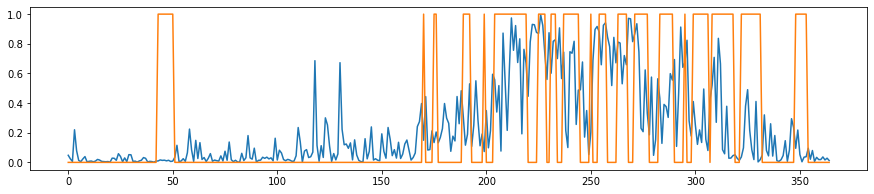

In [227]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot(xg.predict_proba(x_p)[:,1])
plt.plot(y_p.reset_index(drop=True))
# plt.plot(xg.predict(x_p))